In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report

## Exploratory Data Analysis (EDA)

In [49]:
file_path='C:/Users/Admin/DataScienceAssignment/glass.xlsx'

In [50]:
DF=pd.read_excel(file_path,sheet_name=None)
DF.keys()

dict_keys(['Description', 'glass'])

In [51]:
Df=pd.read_excel(file_path,sheet_name='Description')
Df


,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [52]:
df=pd.read_excel(file_path,sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [53]:
df.shape

(214, 10)

In [54]:
df.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [56]:
df.nunique()

RI      178
Na      142
Mg       94
Al      118
Si      133
K        65
Ca      143
Ba       34
Fe       32
Type      6
dtype: int64

In [57]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

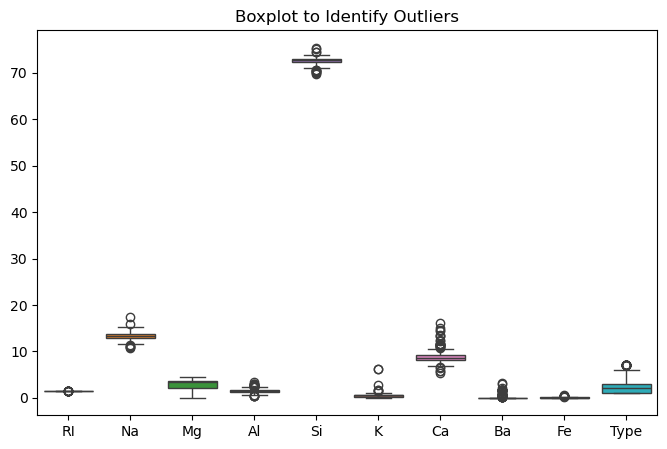

In [58]:
# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df)
plt.title("Boxplot to Identify Outliers")
plt.show()


In [59]:
# using INTER QUANTILE METHODS
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
low_ext=q1-1.5*IQR
upp_ext=q3+1.5*IQR
#print('lower_extreme:',low_ext)
#print('upper_extreme:',upp_ext)

#removing outliers
df1=df[(df >= low_ext) & (df <=upp_ext)]
#print('Before removing outliers:',len(df))
#print('After removing outliers:',len(df1))
#print('Outliers:',len(df)-len(df1))

#capping - change the outliers values to upper or lower values
df1=df.copy()

# Apply capping
df_capped = df1.clip(lower=low_ext, upper=upp_ext, axis=1)
Data=df_capped
data=Data

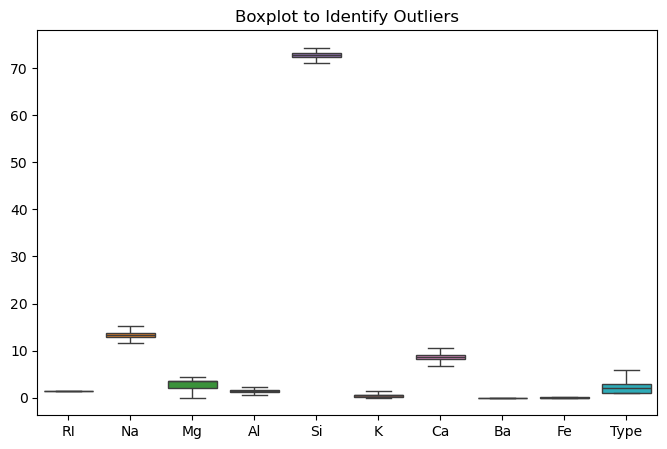

In [60]:
# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=data)
plt.title("Boxplot to Identify Outliers")
plt.show()


In [61]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Data Visualization

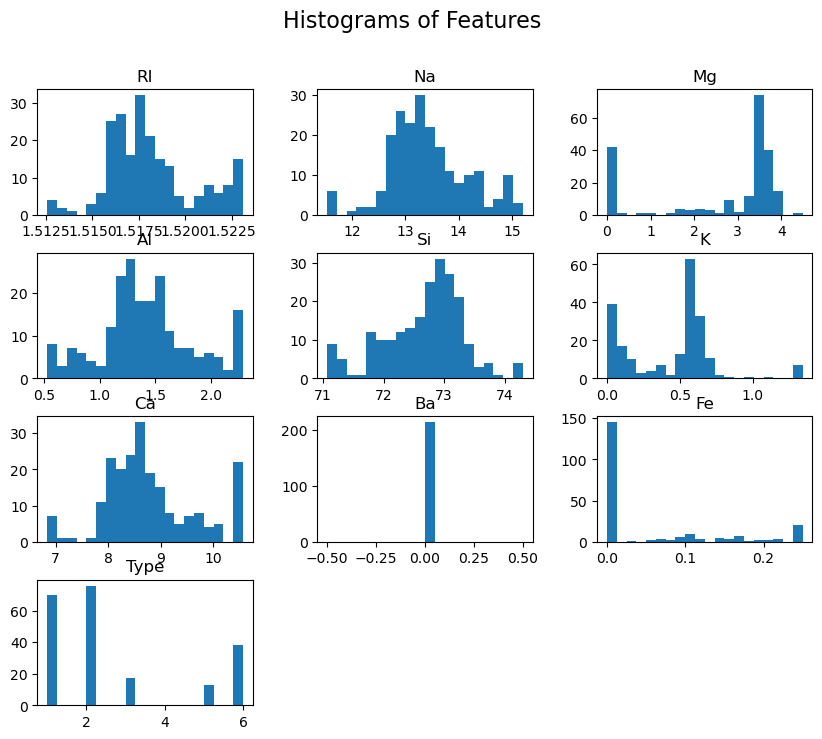

In [62]:
# Plot histograms for all numeric columns
data.hist(bins=20, figsize=(10, 8), grid=False)
plt.suptitle("Histograms of Features", fontsize=16)
plt.show()


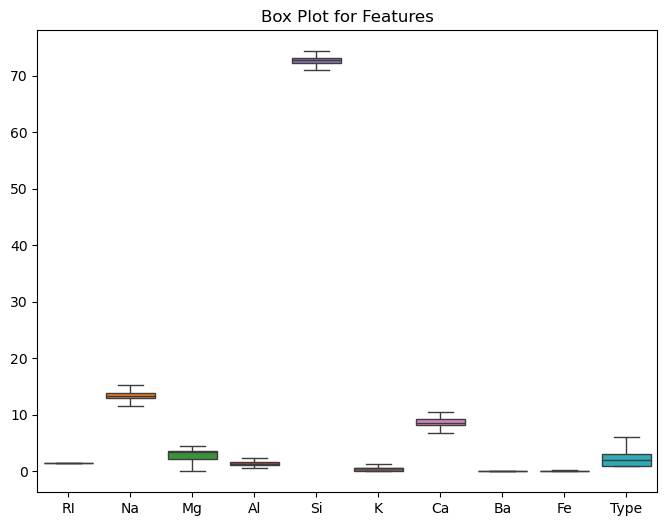

In [63]:
# Box plot for individual features
plt.figure(figsize=(8, 6))
sns.boxplot(data=data)
plt.title("Box Plot for Features")
plt.show()

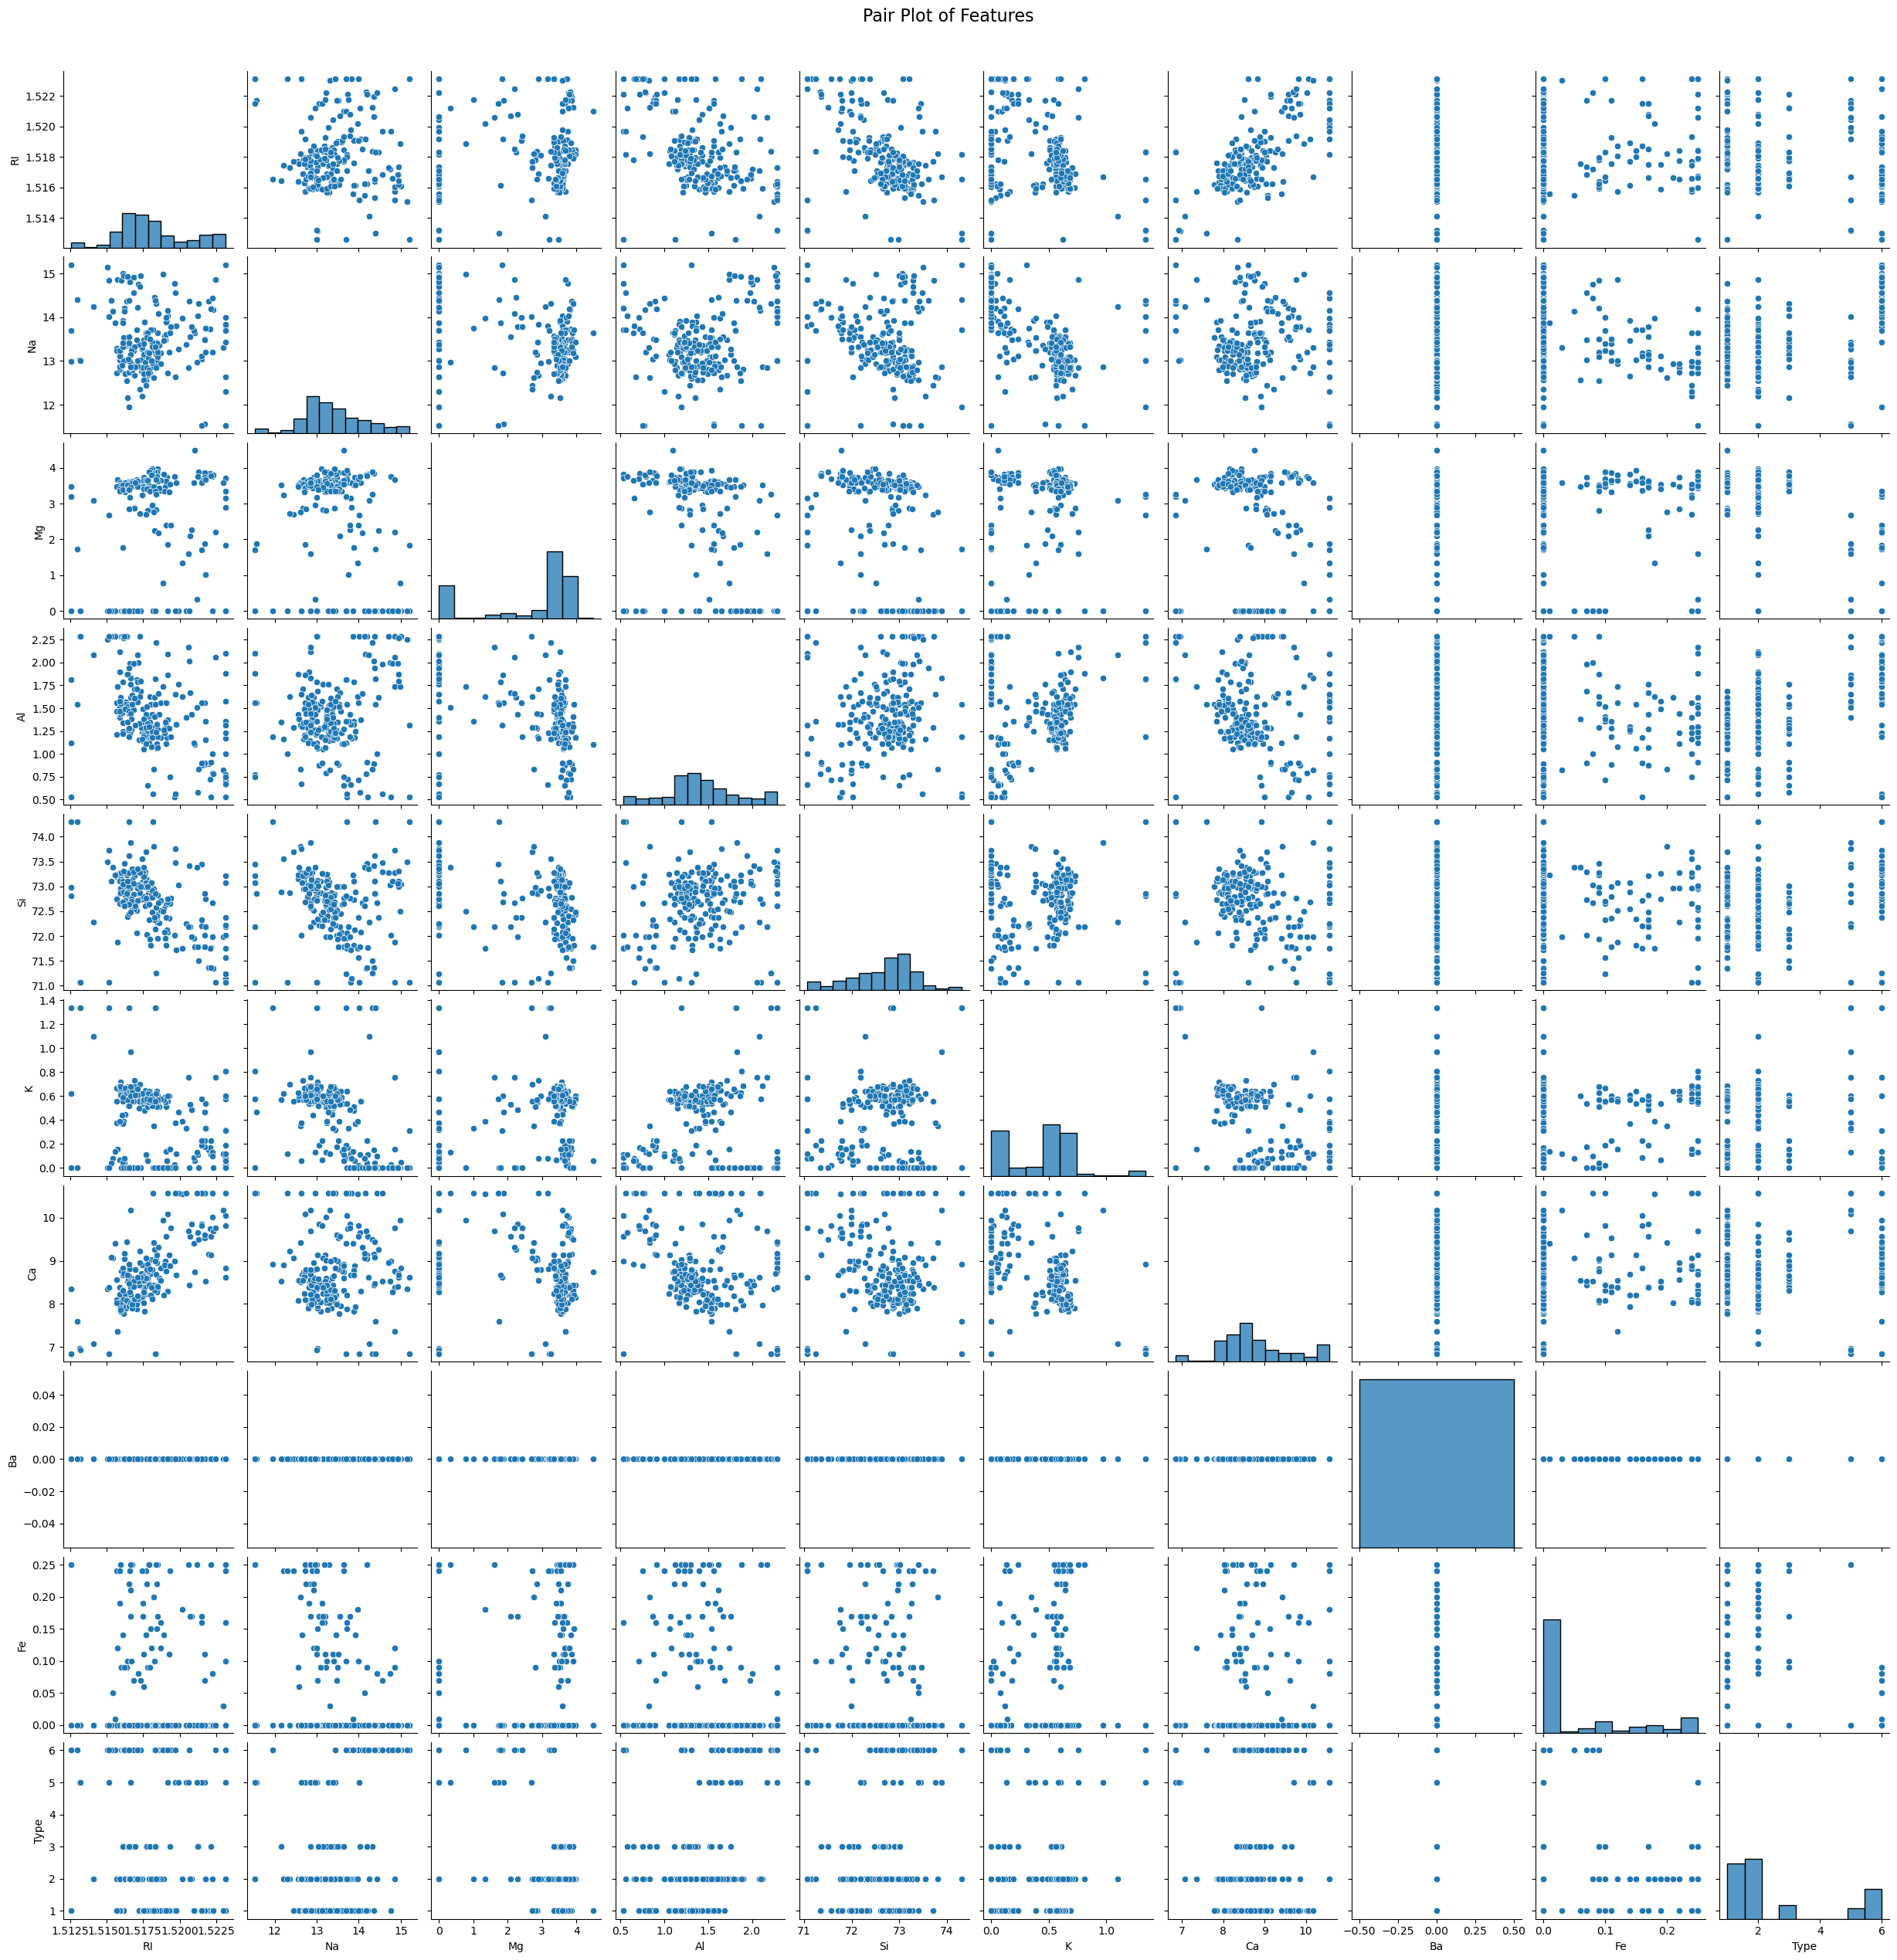

In [64]:
# Pair plot
sns.pairplot(data)
plt.suptitle("Pair Plot of Features", y=1.02, fontsize=16)
plt.show()


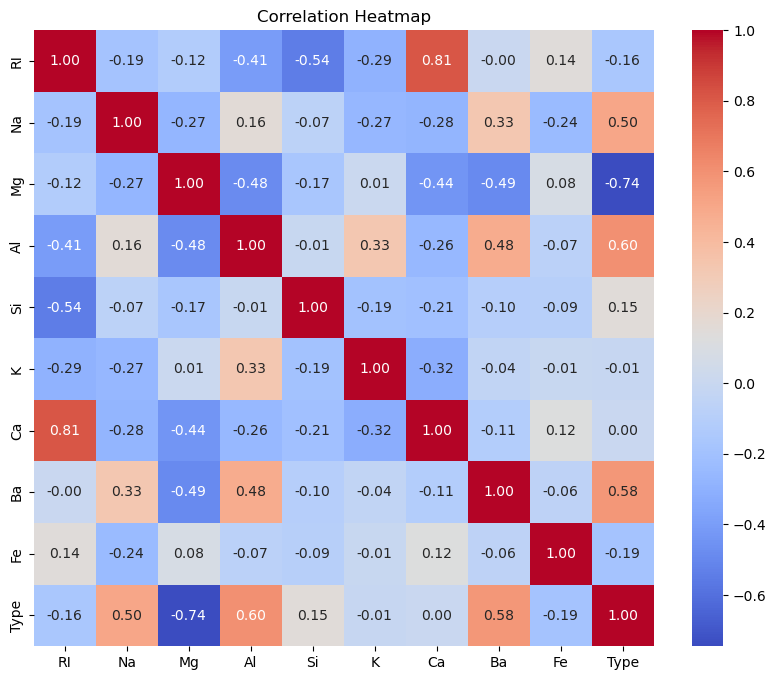

In [65]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


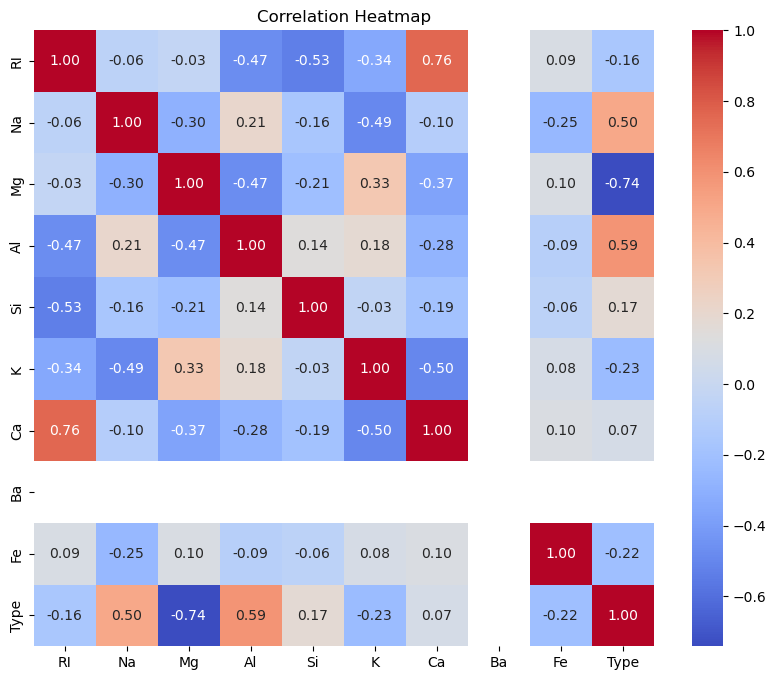

In [66]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [67]:
df_=data.drop(columns=['Ba'],inplace=True)

In [68]:
data

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,1
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.29,72.61,0.08,9.18,0.0,6
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,0.0,6
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,0.0,6
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,0.0,6


In [69]:
data.isnull().any().sum()

0

In [70]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518165,13.405181,2.684533,1.420794,72.668949,0.440789,8.796741,0.052850,2.644860
std,0.002374,0.742792,1.442408,0.424339,0.658469,0.306640,0.873799,0.085568,1.842392
min,1.512570,11.531250,0.000000,0.530000,71.068750,0.000000,6.841250,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.100000,3.000000
max,1.523110,15.201250,4.490000,2.290000,74.298750,1.341250,10.571250,0.250000,6.000000


In [71]:
## standardization

In [72]:
scaler=StandardScaler()
data[['RI','Na','Mg','Al','Si','K','Ca','Fe']]=scaler.fit_transform(data[['RI','Na','Mg','Al','Si','K','Ca','Fe']])

In [73]:
data

,RI,Na,Mg,Al,Si,K,Ca,Fe,Type
0,1.201497,0.316871,1.254639,-0.757758,-1.353189,-1.244720,-0.053617,-0.619091,1
1,-0.234269,0.654228,0.636168,-0.143604,0.092935,0.128174,-1.108959,-0.619091,1
2,-0.838135,0.168434,0.601422,0.281579,0.488716,-0.166017,-1.166314,-0.619091,1
3,-0.213155,-0.263383,0.698710,-0.308954,-0.089734,0.422366,-0.661585,-0.619091,1
4,-0.314503,-0.182417,0.650066,-0.427060,0.625717,0.356990,-0.833652,-0.619091,1
...,...,...,...,...,...,...,...,...,...
209,-0.817021,0.991585,-1.865511,2.053178,-0.089734,-1.179344,0.439641,-0.619091,6
210,-0.555205,2.044139,-1.865511,1.344538,0.595272,-1.440848,-0.455105,-0.619091,6
211,1.049475,1.288459,-1.865511,1.415402,1.143277,-1.440848,-0.409221,-0.619091,6
212,-0.698781,1.315448,-1.865511,1.226432,1.432502,-1.440848,-0.363337,-0.619091,6


##  Random Forest Model Implementation

In [74]:
#split the data into train and test
X=data.iloc[:,:8]
y=data.iloc[:,8]
X.shape,y.shape

((214, 8), (214,))

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [76]:
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((171, 8), (43, 8), (171,), (43,))

In [77]:
from sklearn.ensemble import RandomForestClassifier

In [78]:
#train the model
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [79]:
#predictions
y_pred=rf_model.predict(X_test)
y_pred

array([1, 6, 1, 6, 2, 2, 1, 2, 2, 1, 6, 2, 2, 2, 6, 5, 6, 1, 1, 6, 2, 6,
       6, 6, 3, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 6, 5, 1, 1, 6, 2, 6, 1],
      dtype=int64)

#### Evalution metrics

In [80]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_rf:.2f}")

Accuracy: 0.84


In [81]:
# Precision
precision_rf = precision_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Precision: {precision_rf:.2f}")

Precision: 0.90


In [82]:
# Recall
recall_rf = recall_score(y_test, y_pred, average='macro', zero_division=1)
print(f"Recall: {recall_rf:.2f}")

Recall: 0.72


In [83]:
# F1-Score
f1_rf = f1_score(y_test, y_pred, average='macro')
print(f"F1-Score: {f1_rf:.2f}")

F1-Score: 0.76


In [84]:
#Confusion Matrix
confusion_matrix(y_test,y_pred)

array([[11,  0,  0,  0,  0],
       [ 2, 11,  0,  0,  1],
       [ 2,  0,  1,  0,  0],
       [ 0,  2,  0,  2,  0],
       [ 0,  0,  0,  0, 11]], dtype=int64)

## Bagging and Boosting Methods

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100,random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [87]:
# Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_gb

array([1, 6, 1, 6, 2, 2, 1, 2, 2, 2, 5, 2, 2, 2, 6, 5, 6, 1, 1, 6, 2, 6,
       6, 6, 3, 2, 1, 1, 5, 1, 1, 2, 3, 2, 1, 6, 5, 3, 1, 6, 1, 6, 1],
      dtype=int64)

In [88]:
#Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Accuracy: {accuracy_gb:.2f}")

Accuracy: 0.88


In [89]:
# Precision
precision_gb = precision_score(y_test, y_pred_gb, average='macro', zero_division=1)
print(f"Precision: {precision_gb:.2f}")

Precision: 0.88


In [90]:
# Recall
recall_gb = recall_score(y_test, y_pred_gb, average='macro', zero_division=1)
print(f"Recall: {recall_gb:.2f}")

Recall: 0.89


In [91]:
# F1-Score
f1_gb = f1_score(y_test, y_pred_gb, average='macro')
print(f"F1-Score: {f1_gb:.2f}")

F1-Score: 0.88


In [92]:
# Comparison DataFrame
results = pd.DataFrame({
    "Method": ["Random Forest (Bagging)", "Gradient Boosting"],
    "Accuracy": [accuracy_rf, accuracy_gb],
    "Precision": [precision_rf, precision_gb],
    "Recall": [recall_rf, recall_gb],
    "F1-Score": [f1_rf, f1_gb]
})

print("Comparison of Bagging and Boosting Methods:")
print(results)


Comparison of Bagging and Boosting Methods:
                    Method  Accuracy  Precision    Recall  F1-Score
0  Random Forest (Bagging)  0.837209   0.899231  0.723810  0.756831
1        Gradient Boosting  0.883721   0.884382  0.888961  0.884382


## Additional Notes

In [93]:
#done